# Data set 1 - Large Data Set (Selina)

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset1_url = "https://raw.githubusercontent.com/hbedros/data622-assignment1/refs/heads/main/data/dataset-1.csv"
dataset1 = pd.read_csv(dataset1_url)

print(dataset1.head())

   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Ye

We will inspect the dataset to understand its structure better. This includes checking the types of data, the number of rows and columns, and identifying any missing values.

In [4]:
print(dataset1.info())
print(dataset1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

As we've observed, there are missing values in the Teacher_Quality, Parental_Education_Level, and Distance_from_Home columns. To ensure our dataset is suitable for comprehensive analysis and to avoid bias in our models, we need to address these missing values. Imputation is a practical approach to handle this situation. We will:

Impute missing values in Teacher_Quality with the most frequent category (mode) since this variable is categorical.
Set missing entries in Parental_Education_Level to "Unknown" to acknowledge the absence of data without assuming any specific level of education.
Treat missing values in Distance_from_Home similarly by classifying them as "Unknown"

In [5]:
mode_teacher_quality = dataset1['Teacher_Quality'].mode()[0]
dataset1['Teacher_Quality'].fillna(mode_teacher_quality, inplace=True)

dataset1['Parental_Education_Level'].fillna('Unknown', inplace=True)
dataset1['Distance_from_Home'].fillna('Unknown', inplace=True)

print(dataset1.isnull().sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


Now that we have addressed the missing values, we can now move on to a more detailed exploration of the dataset.

We will create a table to show the frequency of each categorical variable in the dataset. These tables will help us understand the distribution of variables such as Parental Involvement, Access to Resources, Extracurricular Activities, Motivation Level, and Internet Access.

Frequency Distribution for Parental_Involvement:
  Parental_Involvement  Frequency
0               Medium       3362
1                 High       1908
2                  Low       1337


Frequency Distribution for Access_to_Resources:
  Access_to_Resources  Frequency
0              Medium       3319
1                High       1975
2                 Low       1313


Frequency Distribution for Extracurricular_Activities:
  Extracurricular_Activities  Frequency
0                        Yes       3938
1                         No       2669


Frequency Distribution for Motivation_Level:
  Motivation_Level  Frequency
0           Medium       3351
1              Low       1937
2             High       1319


Frequency Distribution for Internet_Access:
  Internet_Access  Frequency
0             Yes       6108
1              No        499




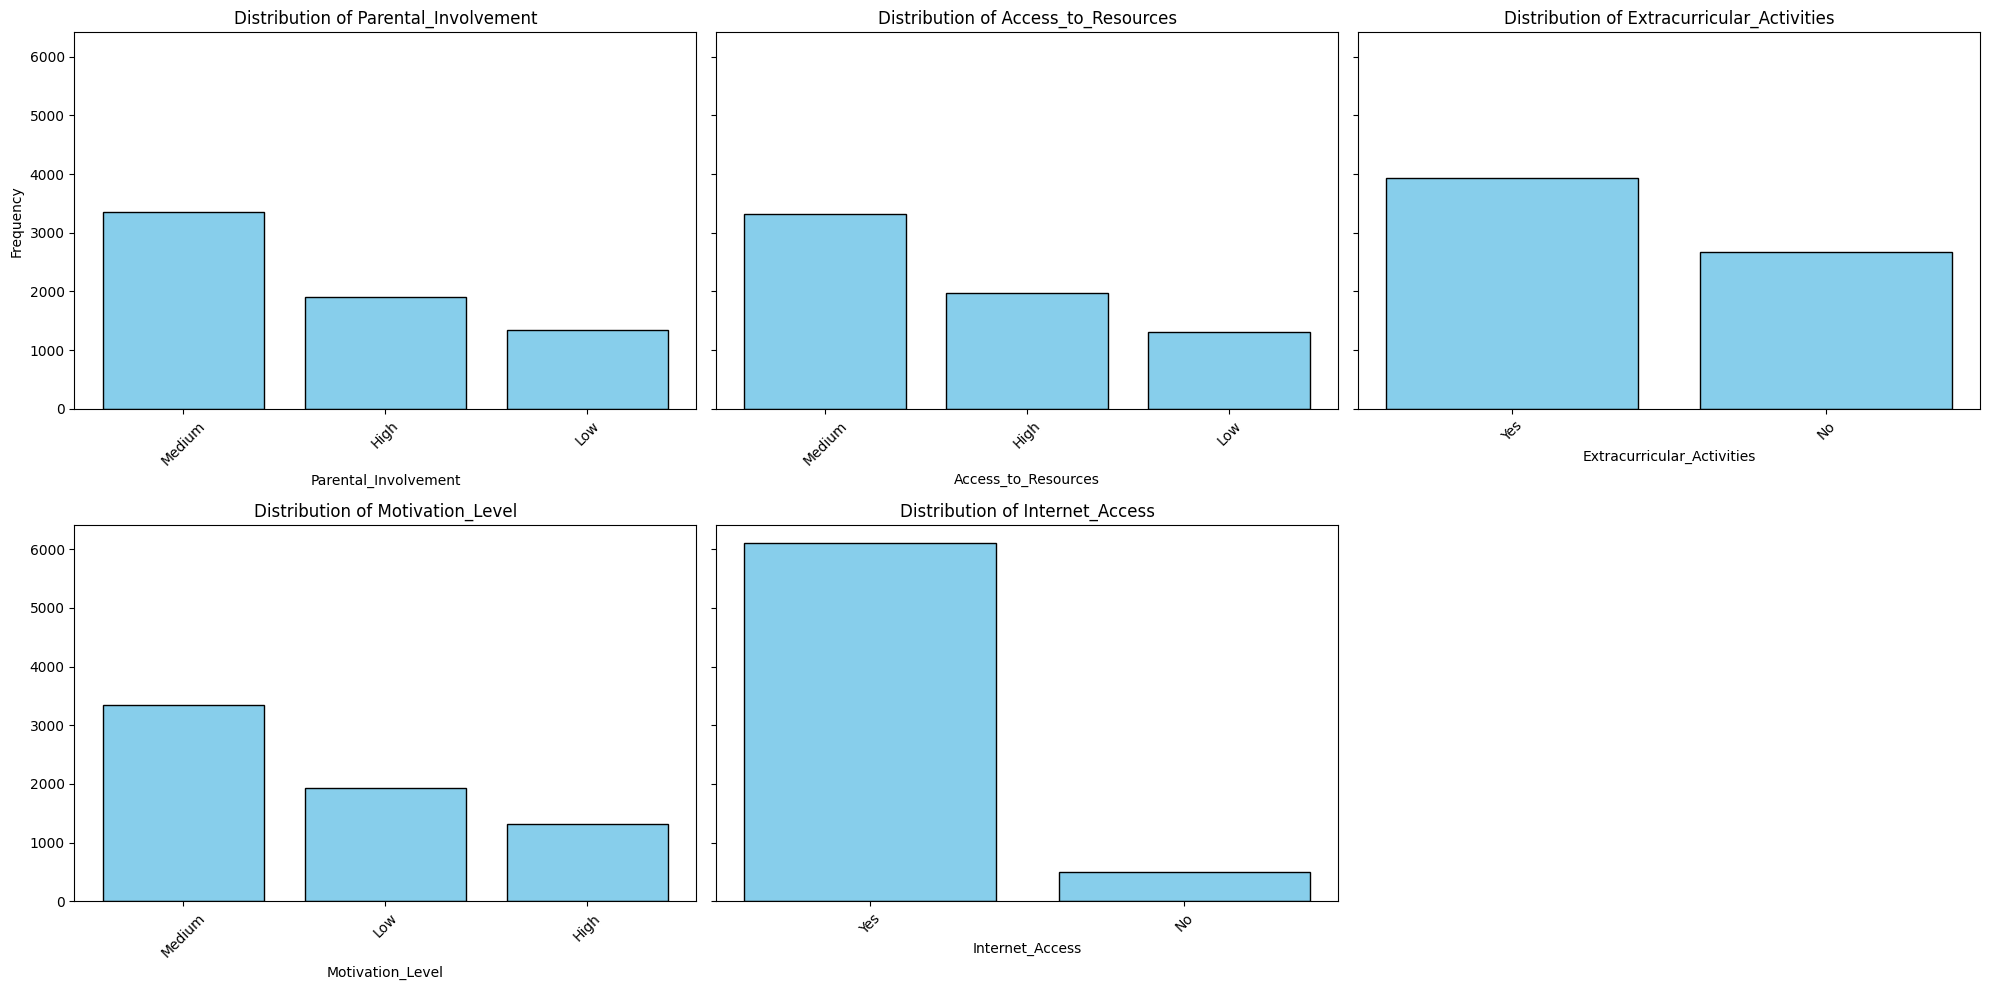

In [8]:
cat_vars = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access']
frequency_tables = {}

for var in cat_vars:
    frequency = dataset1[var].value_counts().reset_index()
    frequency.columns = [var, 'Frequency']
    frequency_tables[var] = frequency
    
    print(f"Frequency Distribution for {var}:")
    print(frequency)
    print("\n")

n_rows = 2
n_cols = (len(cat_vars) + 1) // n_rows  # Calculate number of columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10), sharey=True)

for i, var in enumerate(cat_vars):
    row, col = divmod(i, n_cols)
    frequency = frequency_tables[var]
    axes[row, col].bar(frequency[var], frequency['Frequency'], color='skyblue', edgecolor='black')
    axes[row, col].set_title(f"Distribution of {var}")
    axes[row, col].set_xlabel(var)
    axes[row, col].tick_params(axis='x', rotation=45)

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

axes[0, 0].set_ylabel("Frequency")
plt.tight_layout()
plt.show()


Parental Involvement: Most students have medium or high parental involvement, which generally supports better academic performance, though a notable number still experience low involvement.

Access to Resources: Access to educational resources is mostly medium or high, but there's still a significant minority with low access, potentially hindering their learning opportunities.

Extracurricular Activities: More than half of the students engage in extracurricular activities, enhancing their educational experience, though many do not participate.

Motivation Level: The most common motivation level is medium, with a substantial number of students feeling low motivation, which could impact their educational achievements.

Internet Access: Almost all students have internet access, crucial for modern education, though a small fraction does not, which could limit their learning resources.

Next we will calculate the descriptive statistics to get a better understanding of central tendencies, dispersion, and shape of the dataset’s numerical distributions. This step is important for identifying any outliers, anomalies, or patterns in the data.

In [9]:
numerical_stats = dataset1[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']].describe()
print(numerical_stats)

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.00000

Hours Studied: Students study around 20 hours on average, with most spending 16 to 24 hours. Some study as little as 1 hour, while others reach 44.

Attendance: Attendance is generally high, averaging 80%, with a range from 60% to perfect attendance.

Sleep Hours: Students get about 7 hours of sleep on average, mostly between 6 and 8 hours, which is fairly typical.

Previous Scores: Past scores average 75, but there’s a lot of variation, with scores ranging from 50 to 100.

Tutoring Sessions: Most students attend 1 or 2 tutoring sessions, though a few attend up to 8, while others have none.

Physical Activity: Physical activity averages around 3, with most students in the middle range, from 0 to 6.

Exam Score: The average exam score is 67, with scores fairly close to this range but some students scoring as high as 101.

Next, we will create histograms for each numerical variable to visualize their distributions. This helps in understanding the spread of data points, skewness, and identifying potential outliers.

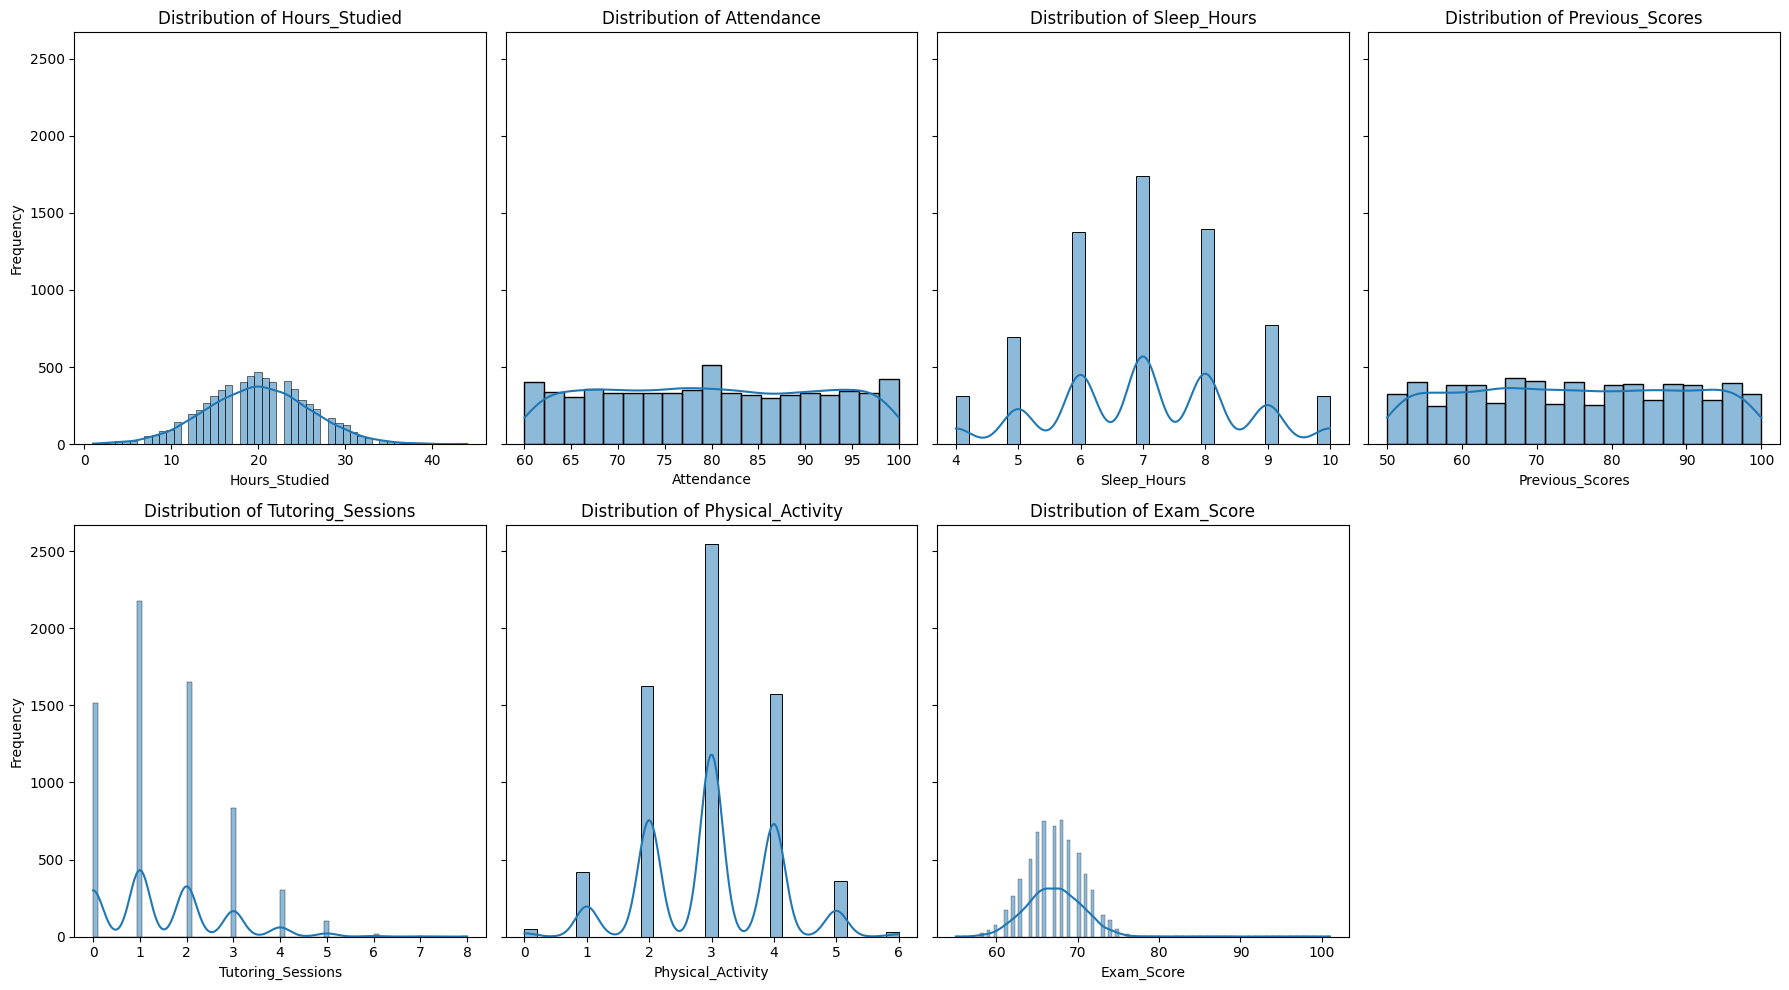

In [10]:
numerical_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharey=True)
axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    sns.histplot(dataset1[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Hide the last empty subplot
axes[-1].set_visible(False)

plt.tight_layout()
plt.show()


Hours Studied: The distribution is roughly symmetrical with a bell shape, suggesting study hours are normally distributed around an average.

Attendance: The distribution is generally uniform, showing attendance is fairly consistent among students, though there are slight variations.

Sleep Hours: The distribution is irregular but shows prominent peaks around 7 hours, indicating this is the most common sleep duration among students.

Previous Scores: This distribution is relatively flat with no strong single peak, showing that students' previous scores are fairly evenly spread across the range.
Tutoring Sessions: The distribution is multimodal, with sharp peaks at 1, 2, and 3 sessions, indicating these are common tutoring frequencies. Very few students have more than 4 sessions.

Physical Activity: This distribution has several peaks, suggesting that certain levels of physical activity are more common, particularly around 2 and 3 sessions.

Exam Score: The distribution is bell-shaped with a central peak around the mean score, showing that most students score near the average, with fewer scoring at the extremes

Next, we will create box plots to visualize the spread and identify any potential outliers in each numerical variable. Box plots will allow us to see the typical range of values, the central tendency, and any extreme values that may stand out in each variable.

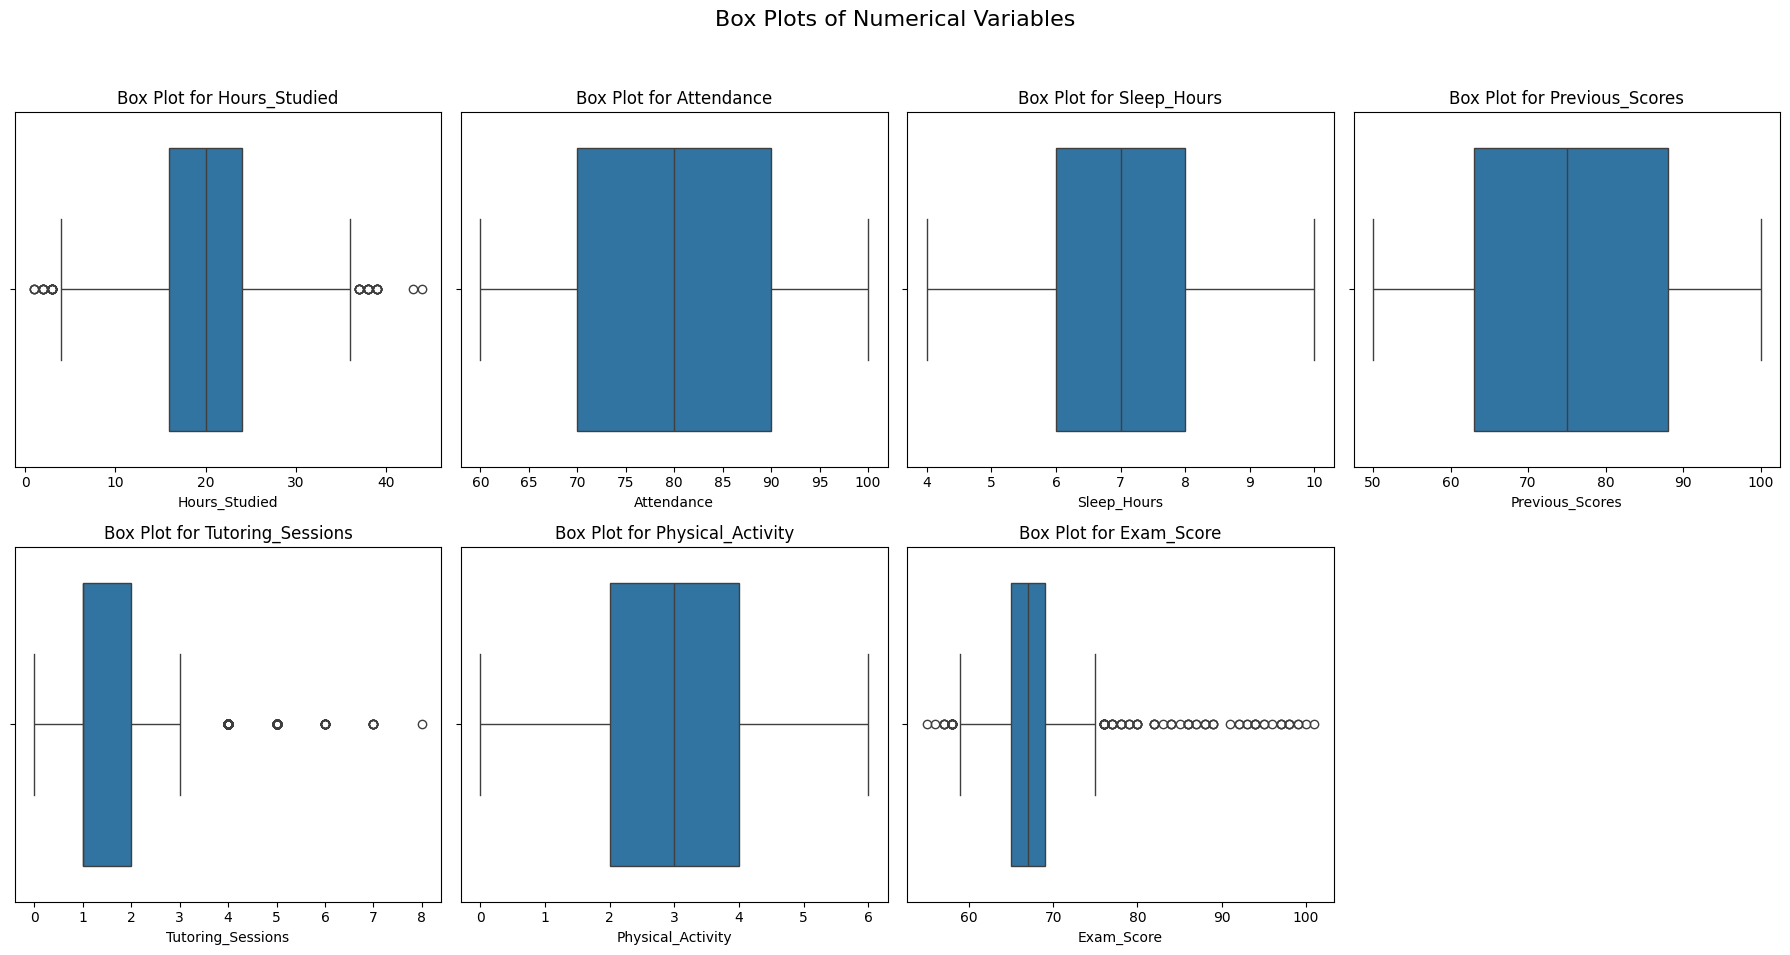

In [12]:
numerical_vars = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # Creating a 2x4 grid
fig.suptitle("Box Plots of Numerical Variables", fontsize=16)

axes = axes.flatten()

for i, var in enumerate(numerical_vars):
    sns.boxplot(x=dataset1[var], ax=axes[i])
    axes[i].set_title(f'Box Plot for {var}')
    axes[i].set_xlabel(var)

axes[-1].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


The box plots show that Hours_Studied, Tutoring_Sessions, and Exam_Score have outliers. In Hours_Studied, some students study much more or less than others. Tutoring_Sessions has outliers on the higher side, meaning a few students attend many more sessions. For Exam_Score, there are outliers at the high end, indicating some students score much higher than their peers. The other variables don't show significant outliers, suggesting more consistent results among those students.

Next, we will calculate and visualize the correlation matrix for the numerical variables. This matrix will help us identify any strong relationships between variables, which could provide insights into factors that influence Exam_Score.

/var/folders/d8/gznq6gz951vd_tvxyycxnv3c0000gn/T/ipykernel_4879/811014019.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset1.corr(method='pearson')


                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

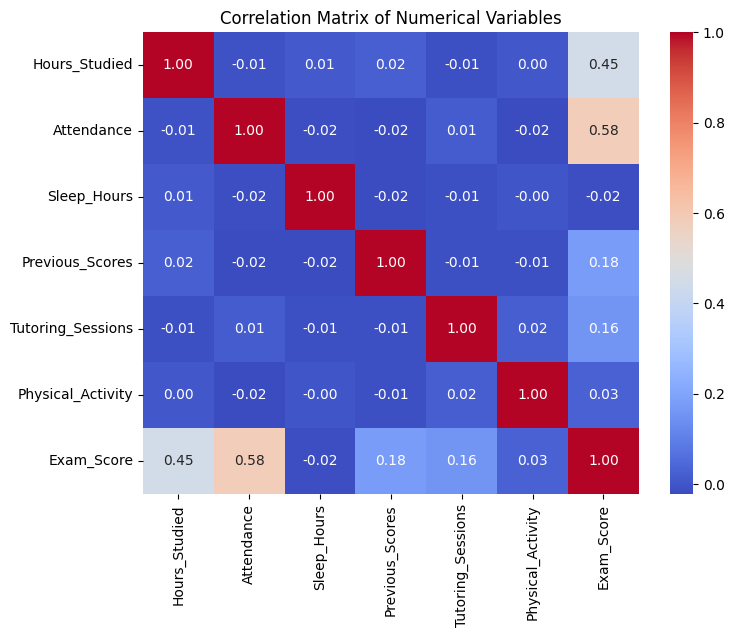

In [13]:
correlation_matrix = dataset1.corr(method='pearson')
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Exam Score shows a moderate positive correlation with Attendance (0.58) and Hours Studied (0.45). This suggests that higher attendance and study hours are associated with better exam scores.
Previous Scores has a weak positive correlation with Exam Score (0.18), indicating a slight influence of past performance on current scores.
Tutoring Sessions has a weak positive correlation with Exam Score (0.16), showing a minor association.
Other variables, such as Sleep Hours (-0.02), Physical Activity (0.03), and their correlations with Exam Score, are near zero, suggesting little to no relationship with exam performance.

We will create scatter plots for each pair of numerical variables (Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, and Exam_Score) to identify any potential relationships.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


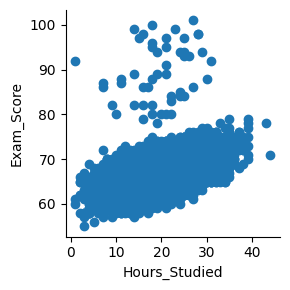

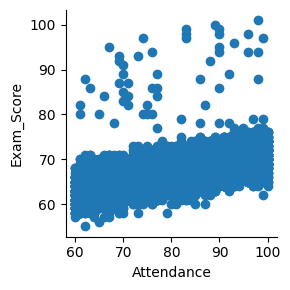

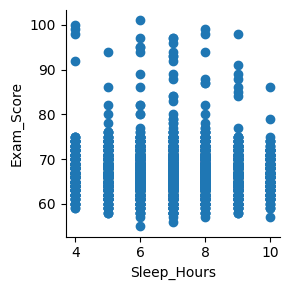

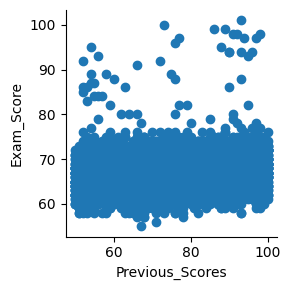

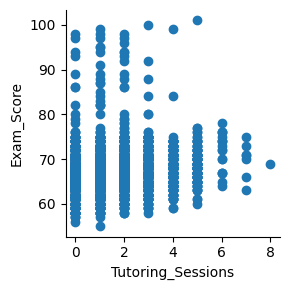

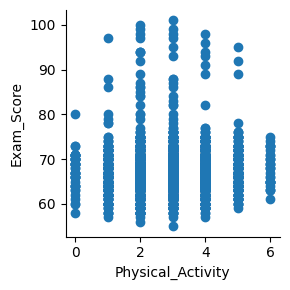

In [14]:
g1 = sns.FacetGrid(dataset1)
g1.map(plt.scatter, 'Hours_Studied', 'Exam_Score')

g2 = sns.FacetGrid(dataset1)
g2.map(plt.scatter, 'Attendance', 'Exam_Score')

g3 = sns.FacetGrid(dataset1)
g3.map(plt.scatter, 'Sleep_Hours', 'Exam_Score')

g4 = sns.FacetGrid(dataset1)
g4.map(plt.scatter, 'Previous_Scores', 'Exam_Score')

g5 = sns.FacetGrid(dataset1)
g5.map(plt.scatter, 'Tutoring_Sessions', 'Exam_Score')

g6 = sns.FacetGrid(dataset1)
g6.map(plt.scatter, 'Physical_Activity', 'Exam_Score')

plt.show()

The scatter plots show that Hours Studied and Attendance have positive relationships with Exam Score, meaning students who study more and have higher attendance tend to score better. This aligns with the correlation matrix, which also indicated these positive associations. On the other hand, Sleep Hours, Previous Scores, Tutoring Sessions, and Physical Activity show little to no correlation with Exam Score, which is consistent with the weak relationships observed in the correlation matrix.